# Download the guide-level aggregated profiles for A549

In [54]:
import os
from pathlib import Path
import s3fs
from tqdm import tqdm
import pandas as pd
import scanpy as sc
import re
from lamin_utils import logger
import pycytominer
from pycytominer.operations import RobustMAD
import numpy as np
import matplotlib.pyplot as plt

from dotenv import load_dotenv
load_dotenv()

_PROJ_DIR = Path(os.getenv("_PROJ_DIR"))
_DATA_DIR = Path(os.getenv("_DATA_DIR"))
_PLATE_DATA_PATH = _DATA_DIR / "A549_guides"

def _get_plate_id_from_path(path: Path) -> str:
    pat = re.compile(r"___(?P<plate_id>CP\d{3}[A-Z])___")
    m = pat.search(str(path))
    plate_id = m["plate_id"] if m else None
    if not plate_id:
        raise ValueError("Couldn't find plate ID.")
    return plate_id

## Get raw files from bucket

In [15]:
bucket_prefix = "cellpainting-gallery/cpg0021-periscope/broad/workspace/profiles/A549"
pattern = "20200805_A549_WG_Screen_guide_ALLBATCHES___*___ALLWELLS.csv.gz"

_PLATE_DATA_PATH.mkdir(parents=True, exist_ok=True)

fs = s3fs.S3FileSystem(anon=True)  # unsigned/public
paths = fs.glob(f"{bucket_prefix}/{pattern}")  # server-side glob


for src in tqdm(paths, desc="Downloading"):
    out = _PLATE_DATA_PATH / Path(src).name
    if out.exists():
        # skip if already downloaded the full file
        info = fs.info(src)
        if out.stat().st_size == info.get("Size", -1):
            continue
    fs.get(src, str(out))


Downloading: 100%|██████████| 9/9 [04:45<00:00, 31.69s/it]


## Extract and convert to AnnData

In [ ]:
for path in _PLATE_DATA_PATH.rglob("*.csv.gz"):
    
    plate_id =_get_plate_id_from_path(path)

    logger.info(f"Processing plate '{plate_id}'.")
    
    plate_df = pd.read_csv(path)
    
    metadata_cols = plate_df.filter(like="Metadata").columns
    metadata = plate_df[metadata_cols]
    metadata = metadata.rename(columns={
        "Metadata_Foci_Barcode_MatchedTo_GeneCode": "Metadata_Gene",
        "Metadata_Foci_Barcode_MatchedTo_Barcode": "Metadata_Guide",
    })
    data = plate_df.drop(columns=metadata_cols)
    
    adata = sc.AnnData(data)
    adata.obs = metadata
    adata.obs["Metadata_Plate"] = plate_id
        
    logger.info("Converted to AnnData.'")
    
    _OUT_PATH = path.parent / f"{plate_id}.h5ad"
    adata.write_h5ad(_OUT_PATH)
        
    logger.success(f"Wrote AnnData to '{_OUT_PATH}'.")
    

• Processing plate 'CP186C'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186C.h5ad'.
• Processing plate 'CP186D'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186D.h5ad'.
• Processing plate 'CP186A'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186A.h5ad'.
• Processing plate 'CP186G'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186G.h5ad'.
• Processing plate 'CP186E'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186E.h5ad'.
• Processing plate 'CP186N'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186N.h5ad'.
• Processing plate 'CP186B'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186B.h5ad'.
• Processing plate 'CP186F'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186F.h5ad'.
• Processing plate 'CP186H'.
• Converted to AnnData.'


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: X converted to numpy array with dtype float64
  return fn(*args_all, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/functools.py:934: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


✓ Wrote AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186H.h5ad'.


## Apply PyCytoMiner

In [38]:
feature_select_opts = [
    "variance_threshold",
    "drop_na_columns",
    "correlation_threshold",
    "blocklist",
    "drop_outliers",
]

for path in _PLATE_DATA_PATH.rglob("*.csv.gz"):

    plate_id =_get_plate_id_from_path(path)
    
    adata = sc.read_h5ad(path.parent / f"{plate_id}.h5ad")

    logger.info(f"Read AnnData for plate '{plate_id}'.")

    metadata_cols = adata.obs.columns
    data = pd.concat([adata.to_df(), adata.obs], axis=1)

    # # Run PyCytoMiner
    # scaler = RobustMAD(epsilon=1e-18)
    # fitted_scaler = scaler.fit(data)
    # fitted_scaled = fitted_scaler.transform(data)

    data_scaled = pycytominer.normalize(
        profiles=data,
        features="infer",
        meta_features="infer",
        samples="Metadata_Gene == 'nontargeting'",
    )

    logger.info("Scaled data.")

    data_scaled_filtered = pycytominer.feature_select(
        profiles=data_scaled,
        features="infer",
        samples="Metadata_Gene == 'nontargeting'",
        operation=feature_select_opts,
    )

    logger.info("Ran feature selection.")
    
    
    logger.info(f"Shape before dropping NaN-columns: {data_scaled_filtered.shape}")
    cols_with_nans = data_scaled_filtered.isna().sum(axis=0)
    cols_with_nans = cols_with_nans[cols_with_nans > 0]
    data_scaled_filtered = data_scaled_filtered.drop(columns=cols_with_nans.index.tolist())
    logger.info(f"Shape after dropping NaN-columns: {data_scaled_filtered.shape}")
    
    adata_filtered = sc.AnnData(
        X=data_scaled_filtered.drop(columns=metadata_cols),
        obs=adata.obs,
    )

    _OUT_PATH = path.parent / f"{plate_id}_filtered.h5ad"
    adata_filtered.write_h5ad(_OUT_PATH)
        
    logger.success(f"Wrote filtered AnnData to '{_OUT_PATH}'.")


• Read AnnData for plate 'CP186C'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79192, 1504)
• Shape after dropping NaN-columns: (79192, 1491)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186C_filtered.h5ad'.
• Read AnnData for plate 'CP186D'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79682, 1603)
• Shape after dropping NaN-columns: (79682, 1599)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186D_filtered.h5ad'.
• Read AnnData for plate 'CP186A'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (77505, 1632)
• Shape after dropping NaN-columns: (77505, 1609)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186A_filtered.h5ad'.
• Read AnnData for plate 'CP186G'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79185, 1364)
• Shape after dropping NaN-columns: (79185, 1349)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186G_filtered.h5ad'.
• Read AnnData for plate 'CP186E'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79596, 1647)
• Shape after dropping NaN-columns: (79596, 1640)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186E_filtered.h5ad'.
• Read AnnData for plate 'CP186N'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (74184, 1842)
• Shape after dropping NaN-columns: (74184, 1817)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186N_filtered.h5ad'.
• Read AnnData for plate 'CP186B'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (78980, 1350)
• Shape after dropping NaN-columns: (78980, 1346)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186B_filtered.h5ad'.
• Read AnnData for plate 'CP186F'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (77261, 1666)
• Shape after dropping NaN-columns: (77261, 1631)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186F_filtered.h5ad'.
• Read AnnData for plate 'CP186H'.


/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


• Scaled data.
• Ran feature selection.
• Shape before dropping NaN-columns: (79186, 1384)
• Shape after dropping NaN-columns: (79186, 1365)
✓ Wrote filtered AnnData to '/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186H_filtered.h5ad'.


In [37]:
data_scaled_filtered.isna().sum(axis=0)

Metadata_Gene                                         0
Metadata_Guide                                        0
Metadata_Plate                                        0
Cells_AreaShape_BoundingBoxMinimum_X                  0
Cells_AreaShape_BoundingBoxMinimum_Y                  0
                                                     ..
Nuclei_Texture_SumVariance_DAPI_Painting_10_03_256    0
Nuclei_Texture_SumVariance_Phalloidin_10_01_256       0
Nuclei_Texture_SumVariance_Phalloidin_10_03_256       0
Nuclei_Texture_Variance_DAPI_Painting_10_02_256       0
Nuclei_Texture_Variance_DAPI_Painting_5_00_256        0
Length: 1504, dtype: int64

## Identify guides in a visual feature for one AnnData

In [52]:
adata = sc.read_h5ad("/lustre/groups/ml01/projects/2025_ttreis_periscope_sanity_check/A549_guides/CP186H_filtered.h5ad")

In [40]:
sc.pp.neighbors(adata)
sc.pp.pca(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/scanpy/neighbors/__init__.py:577: UserWarning: You’re trying to run this on 1362 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  x = _choose_representation(self._adata, use_rep=use_rep, n_pcs=n_pcs)
/ictstr01/groups/ml01/workspace/ttreis/projects/PERISCOPE_sanity_check/.pixi/envs/default/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/localscratch/tim.treis/ipykernel_2027836/2857666902.py:4: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be Fa

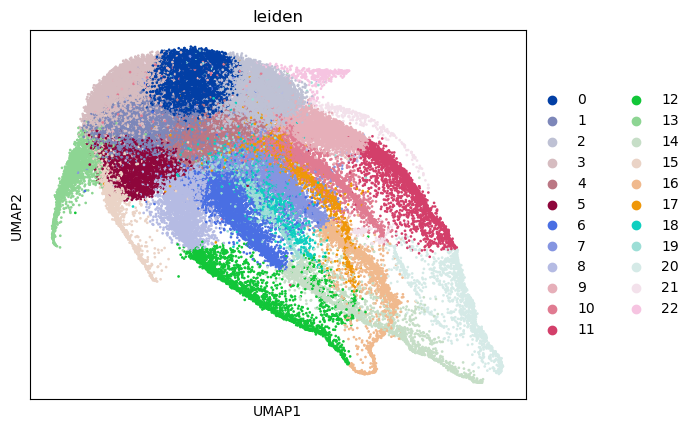

In [42]:
sc.pl.umap(adata, color="leiden", size=15)

In [50]:
leiden13_guides = adata[adata.obs.leiden == "13"].obs.Metadata_Guide.tolist()
adata.obs["leiden13"] = ["leiden13" if guide in leiden13_guides else np.nan for guide in adata.obs.Metadata_Guide]

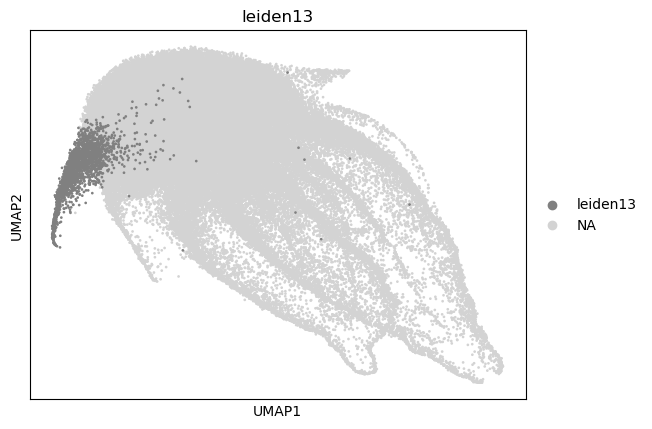

In [51]:
sc.pl.umap(adata, color="leiden13", size=15)

## Localise guides in all other AnnDatas

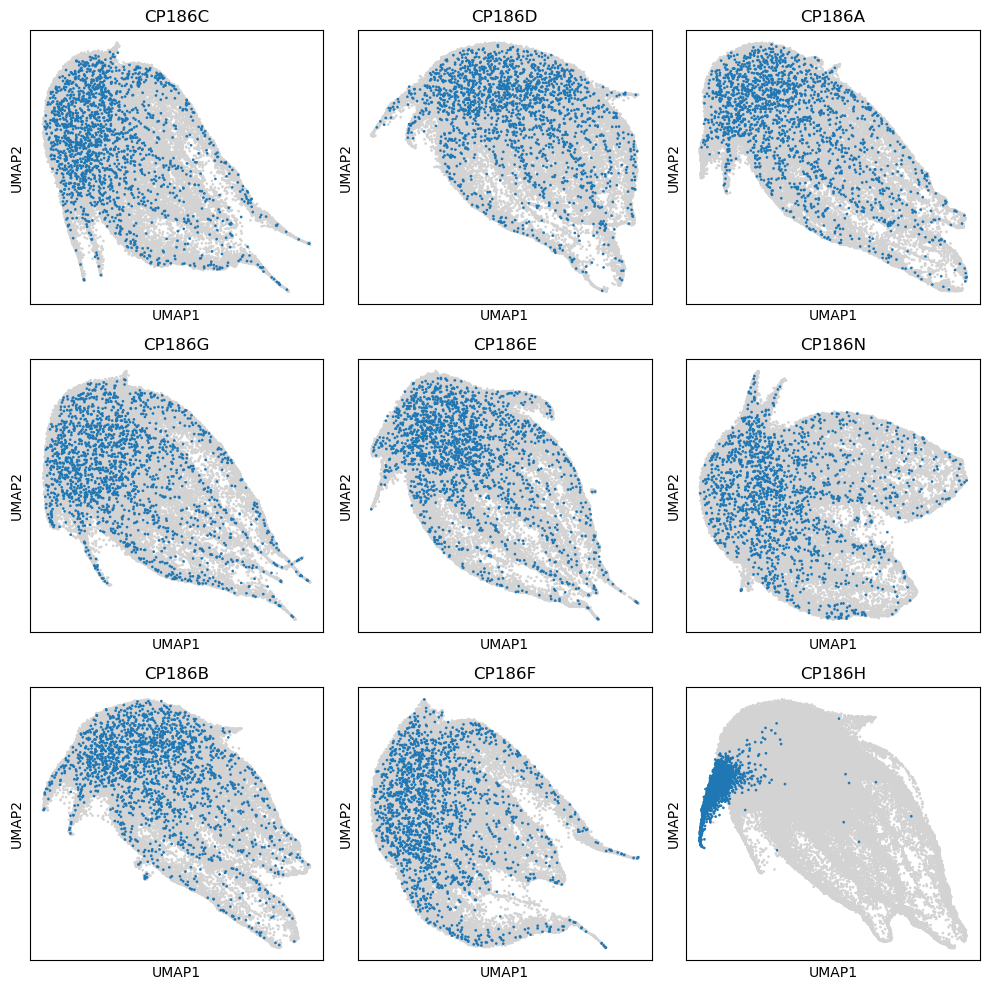

In [58]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10))
axs = axs.flatten()

for i, path in enumerate(_PLATE_DATA_PATH.rglob("*.csv.gz")):

    plate_id =_get_plate_id_from_path(path)
    
    adata = sc.read_h5ad(path.parent / f"{plate_id}_filtered.h5ad")
    
    sc.pp.pca(adata)
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    
    adata.obs["leiden13"] = ["leiden13" if guide in leiden13_guides else np.nan for guide in adata.obs.Metadata_Guide]
    
    sc.pl.umap(adata, color="leiden13", size=15, ax=axs[i], show=False, legend_loc=None, title=plate_id)

fig.tight_layout()